## Proyecto de curso - Inteligencia Artificial
## Luis Eduardo Herrera - Hugo Felipe Vargas - William Barrera
Se realizará un analisis de un conjunto de datos que relaciona las calificaciones de estudiantes en tres tipos de exámenes y una variedad de factores personales, sociales y economicos y su efecto en ellos.

Puede obtener más información del conjunto aquí.

El conjunto de datos contiene las calificaciones de 10000 estudiantes clasificados bajo los siguientes parámetros:

Género Raza/Grupo étnico Nivel de educación de los padres Almuerzo Curso de preparación para exámenes Calificación de Matemáticas Calificación de Lectura Curso de Escritura El código a continuación realizará un análisis de los datos para predecir que estudiantes podrán pasar la materia a partir de sus calificaciones en los exámenes.

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sklearn

In [2]:
StudentsPerformance_DataSet = 'https://raw.githubusercontent.com/LeHerrera32/proyecto_ia/main/data/studentsPerformance.csv'
StudentsPerformance_DF = pd.read_csv(StudentsPerformance_DataSet)

In [3]:
print("StudentsPerformance shape:",StudentsPerformance_DF.shape)

StudentsPerformance shape: (1000, 8)


In [4]:
print("StudentsPerformance columns:",StudentsPerformance_DF.columns)

StudentsPerformance columns: Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [5]:
StudentsPerformance_DF.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [6]:
StudentsPerformance_DF.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
def GetCategories(df):
  Categories = {}
  Data_columns = df.columns
  Data_types = df.dtypes
  for column in Data_columns:
    if Data_types[column] != np.int64:
      category = df[column].unique()
      Categories[column] = category
  return Categories

In [8]:
Categories = GetCategories(StudentsPerformance_DF)
for key, value in Categories.items():
    print(key, ':', value)
    print()

gender : ['female' 'male']

race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']

parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch : ['standard' 'free/reduced']

test preparation course : ['none' 'completed']



In [9]:
def FeatureBinaries(x, s):
  if x == s:
    return 1.0
  else:
    return 0.0

def IntToFloat(x):
  result = float(x) / 10.0
  return result

def Approved(x):
  if x >= 60.0:
    return 1.0
  else:
    return 0.0

def NumericColumns(df, category):
  processed_df = pd.DataFrame()
  feature = []
  for c in category:
    feature.append(c)
  for column in df.columns:
    if column not in feature:
      processed_df[column] = df[column].apply(lambda x: IntToFloat(x))
    else:
      categories = category[column]
      for catego in categories:
        processed_df[catego] = df[column].apply(lambda x: FeatureBinaries(x, catego))
  score = (df['math score'] + df['reading score'] + df['writing score']) / 3
  processed_df["approved"] = score.apply(lambda x: Approved(x))
  return processed_df

In [10]:
Processed_StudentsPerformance_DF = NumericColumns(StudentsPerformance_DF, Categories)
Processed_StudentsPerformance_DF.head(20)

,female,male,group B,group C,group A,group D,group E,bachelor's degree,some college,master's degree,associate's degree,high school,some high school,standard,free/reduced,none,completed,math score,reading score,writing score,approved
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,7.2,7.2,7.4,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.9,9.0,8.8,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,9.0,9.5,9.3,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.7,5.7,4.4,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,7.6,7.8,7.5,1.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,7.1,8.3,7.8,1.0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,8.8,9.5,9.2,1.0
7,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,4.3,3.9,0.0
8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,6.4,6.4,6.7,1.0
9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.8,6.0,5.0,0.0


In [11]:
print("Processed_StudentsPerformance_DF shape:",Processed_StudentsPerformance_DF.shape)

Processed_StudentsPerformance_DF shape: (1000, 21)


In [12]:
print("Processed_StudentsPerformance_DF shape:",Processed_StudentsPerformance_DF.columns)

Processed_StudentsPerformance_DF shape: Index(['female', 'male', 'group B', 'group C', 'group A', 'group D', 'group E',
       'bachelor's degree', 'some college', 'master's degree',
       'associate's degree', 'high school', 'some high school', 'standard',
       'free/reduced', 'none', 'completed', 'math score', 'reading score',
       'writing score', 'approved'],
      dtype='object')


In [13]:
Num_Feature = Processed_StudentsPerformance_DF.columns.shape[0] - 1
print("number of features:",Num_Feature)

number of features: 20


In [14]:
Train_X = Processed_StudentsPerformance_DF[Processed_StudentsPerformance_DF.columns[0:Num_Feature]]
Train_Y = Processed_StudentsPerformance_DF['approved']

In [15]:
print("Train_X shape:",Train_X.shape)
print("Train_Y shape:",Train_Y.shape)

Train_X shape: (1000, 20)
Train_Y shape: (1000,)


In [16]:
Train_X.head(20)

,female,male,group B,group C,group A,group D,group E,bachelor's degree,some college,master's degree,associate's degree,high school,some high school,standard,free/reduced,none,completed,math score,reading score,writing score
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,7.2,7.2,7.4
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.9,9.0,8.8
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,9.0,9.5,9.3
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.7,5.7,4.4
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,7.6,7.8,7.5
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,7.1,8.3,7.8
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,8.8,9.5,9.2
7,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,4.3,3.9
8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,6.4,6.4,6.7
9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.8,6.0,5.0


In [17]:
Train_Y

0      1.0
1      1.0
2      1.0
3      0.0
4      1.0
      ... 
995    1.0
996    0.0
997    1.0
998    1.0
999    1.0
Name: approved, Length: 1000, dtype: float64

In [18]:
def Histogram(df):
  for c in df.columns:
    fig = plt.figure(figsize=(15,15))
    fig = df[c].plot.hist(bins=50)
    plt.title("Histogram of " + c)
    plt.xlabel(c)
  fig.legend()
  plt.show
  plt.clf
  return

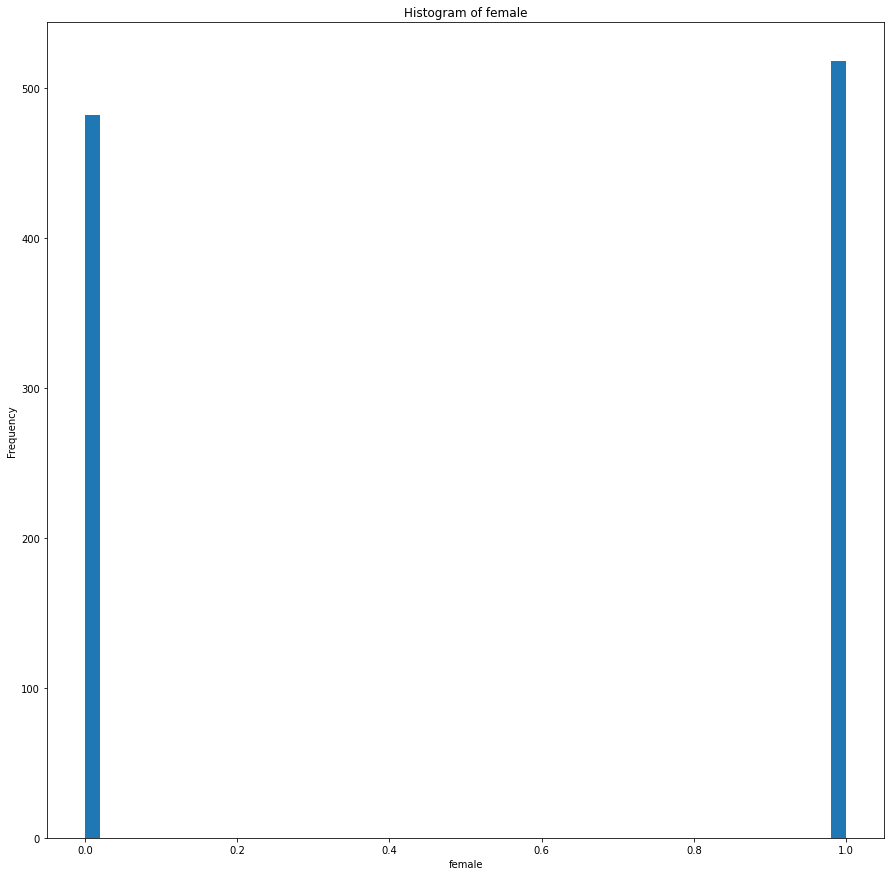

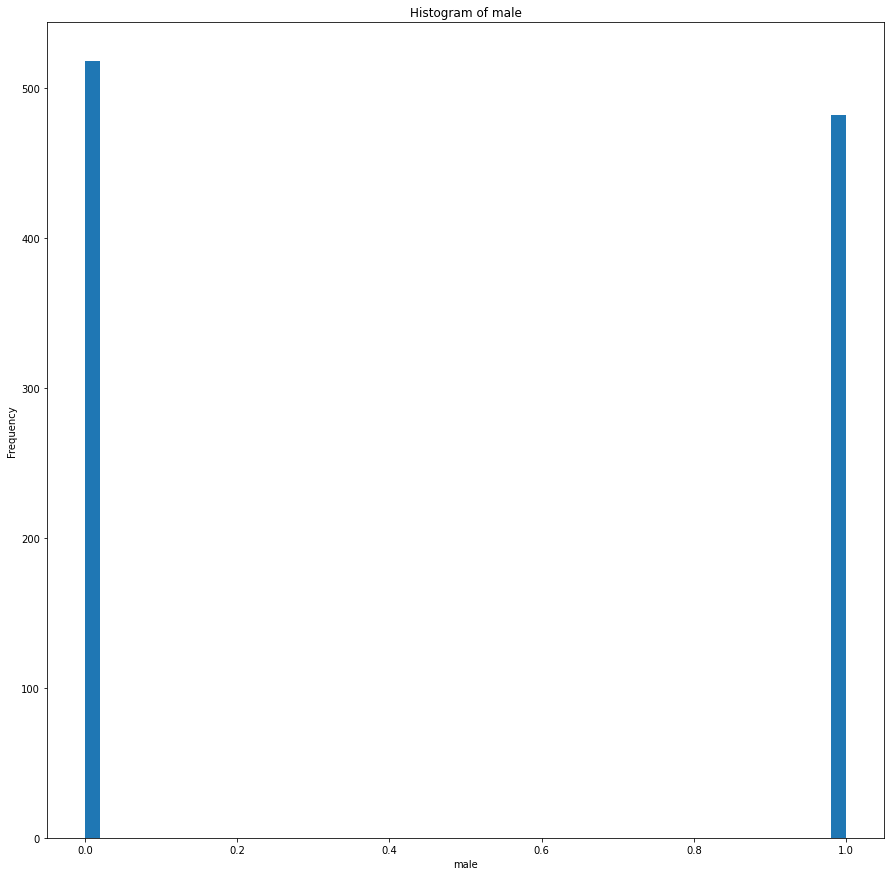

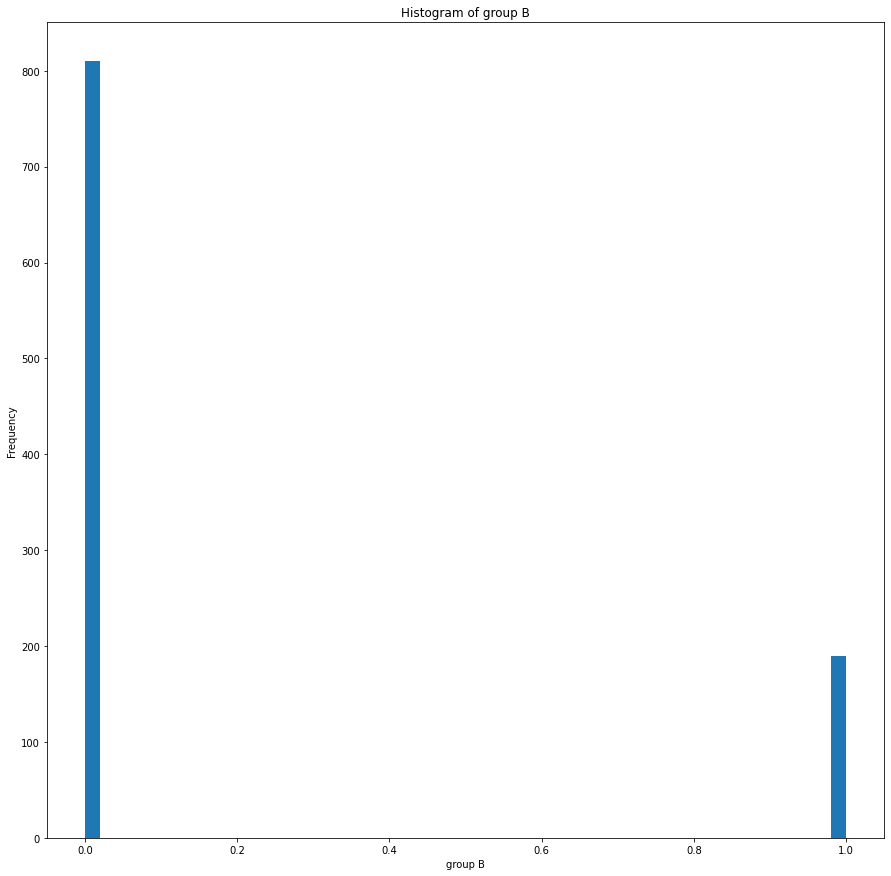

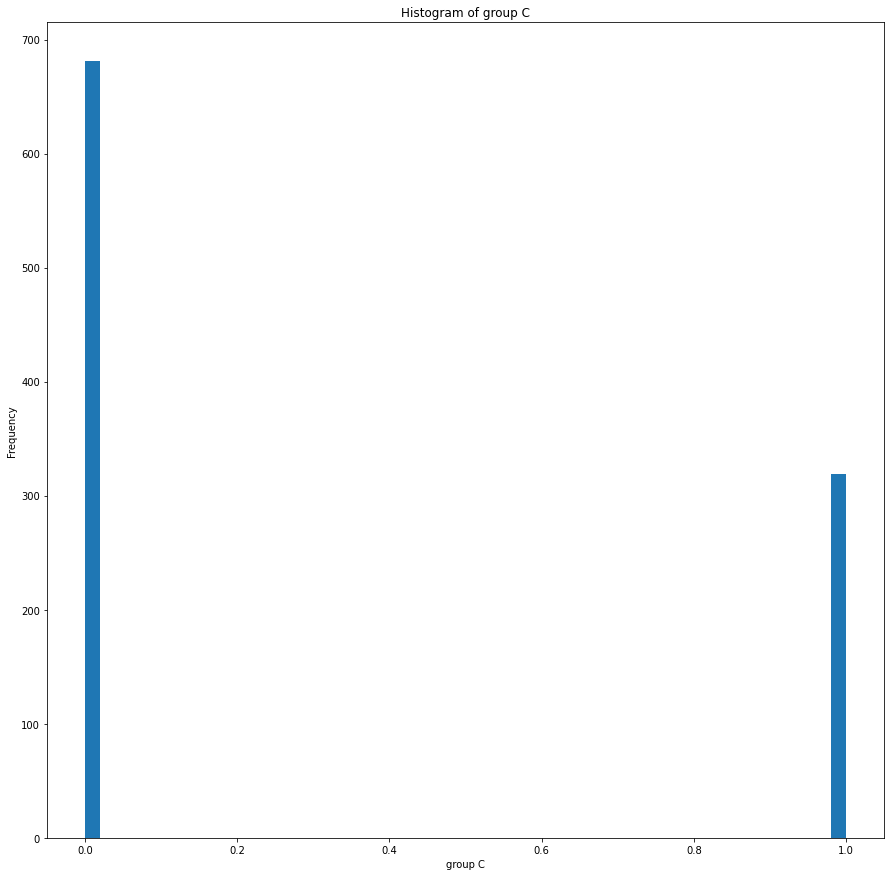

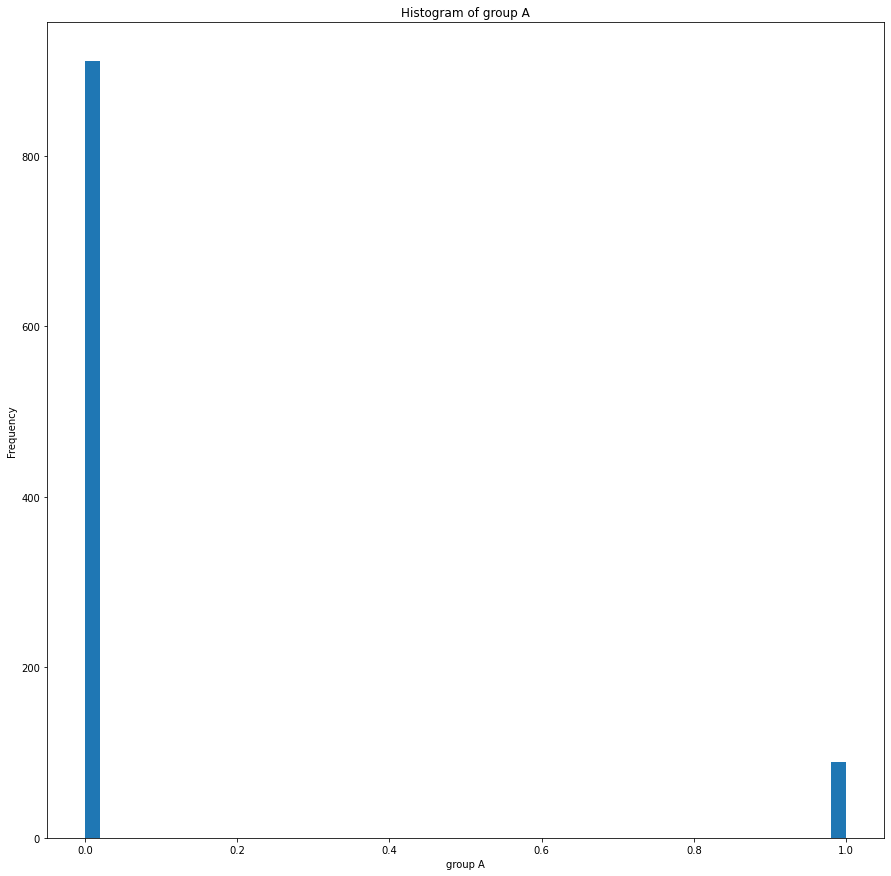

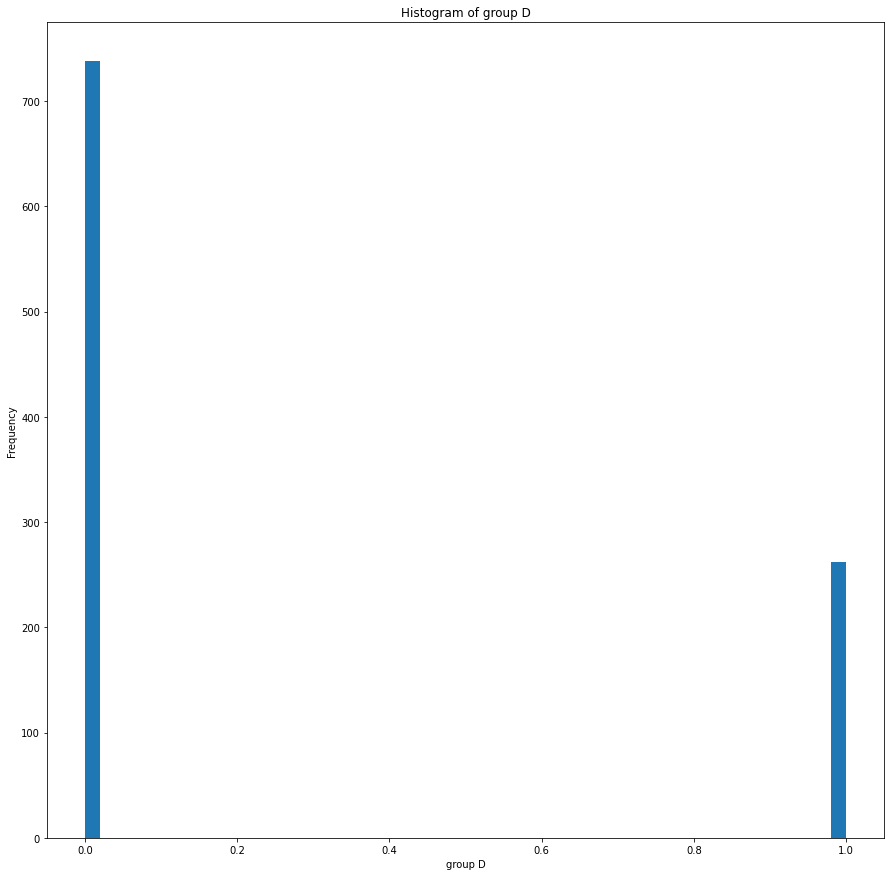

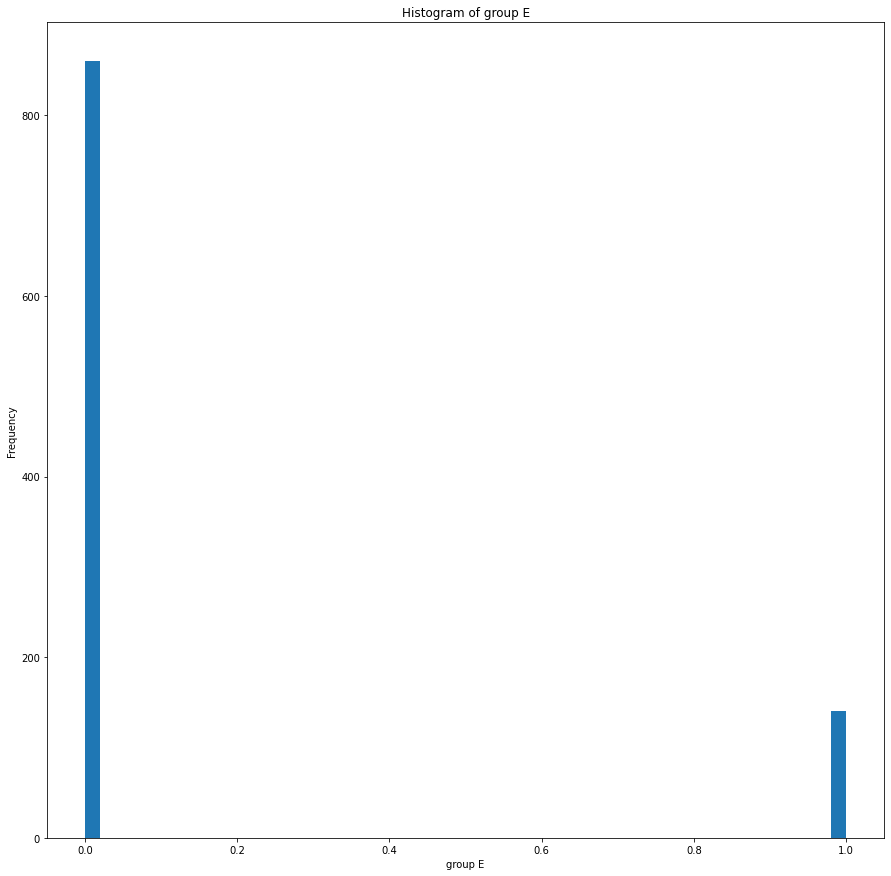

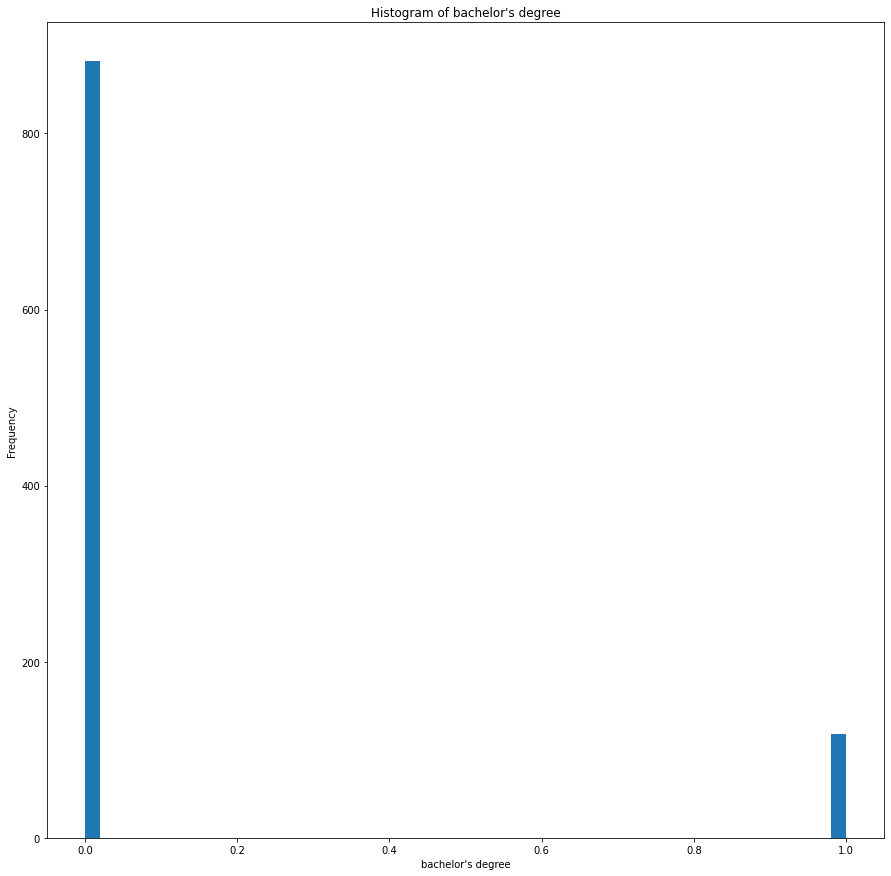

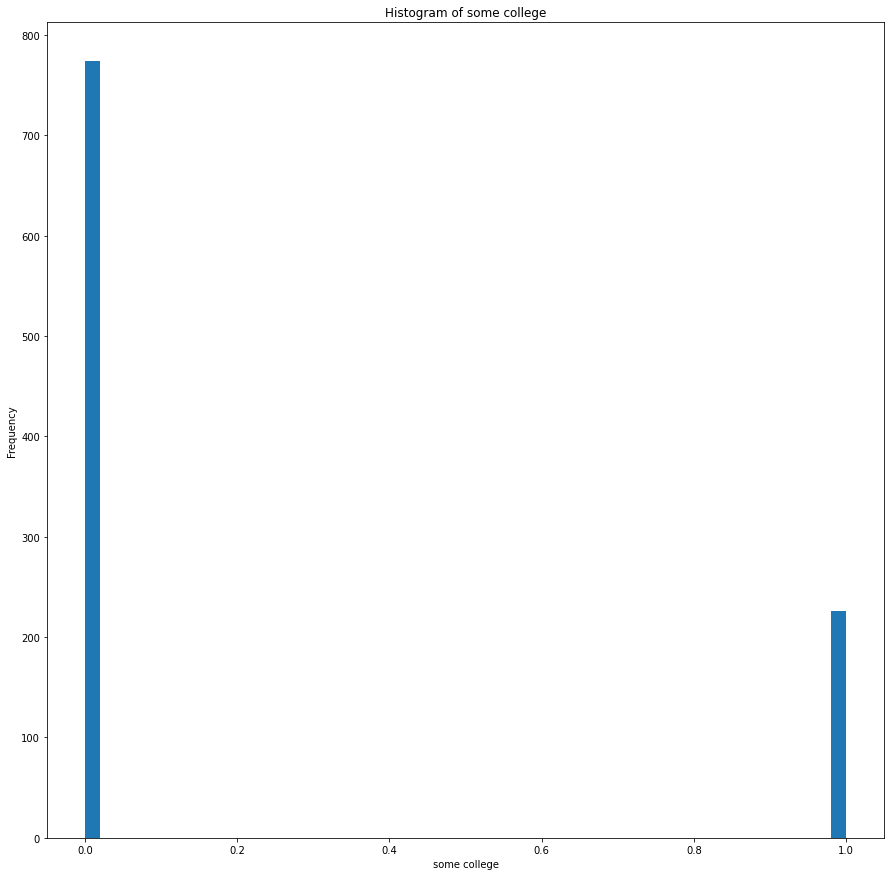

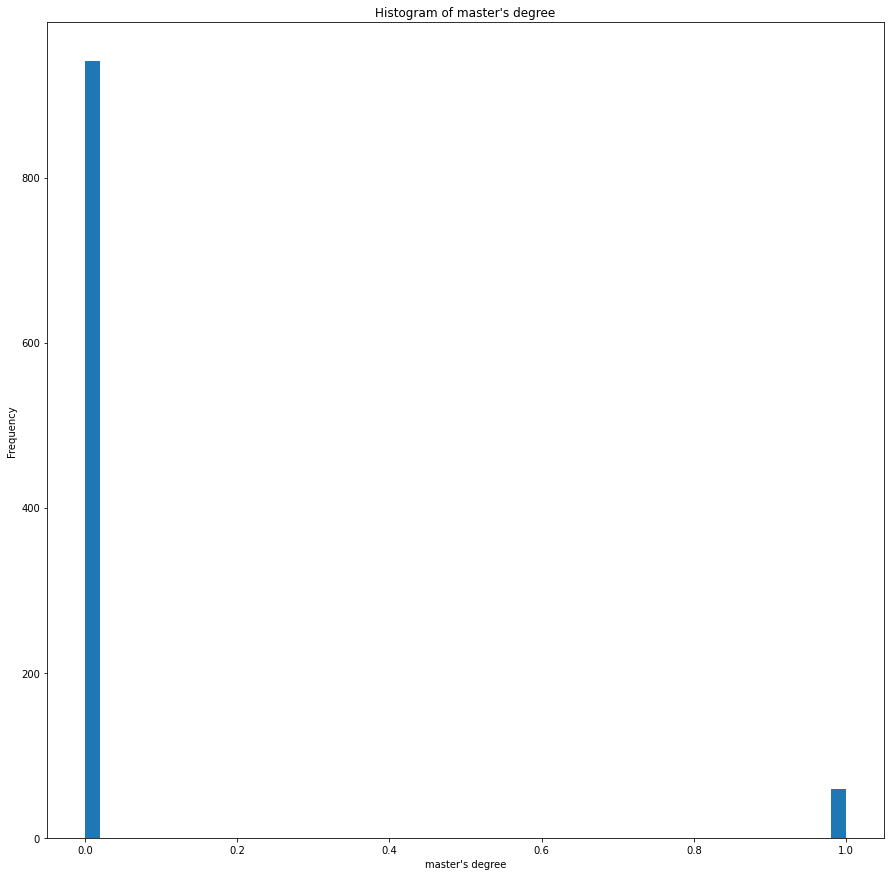

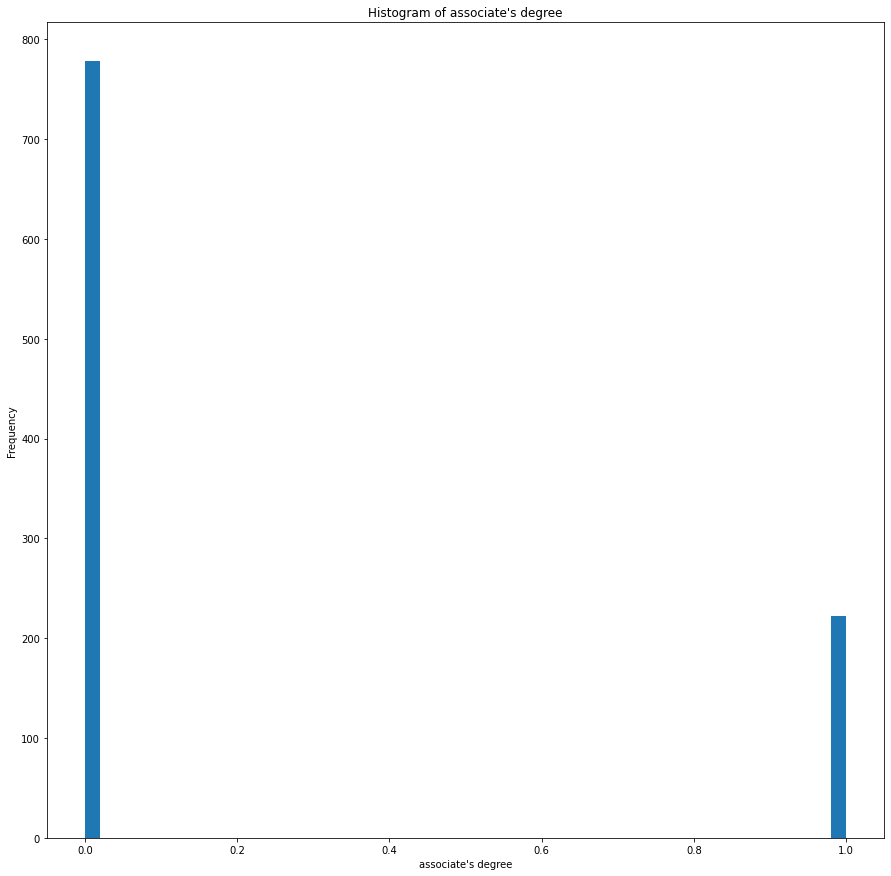

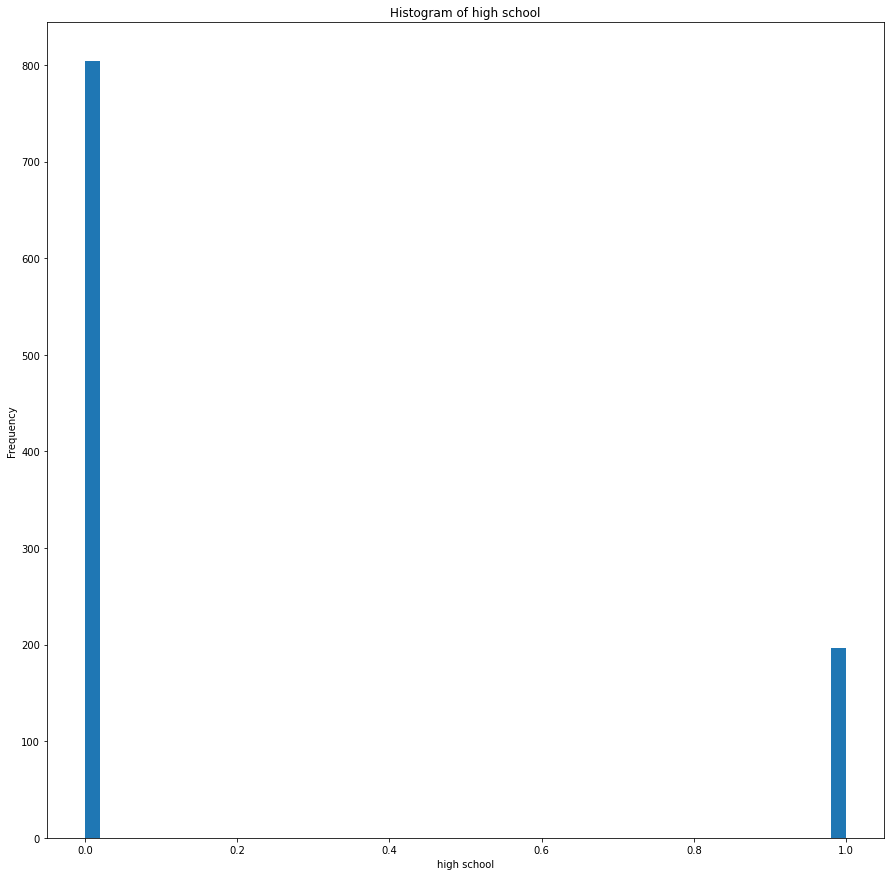

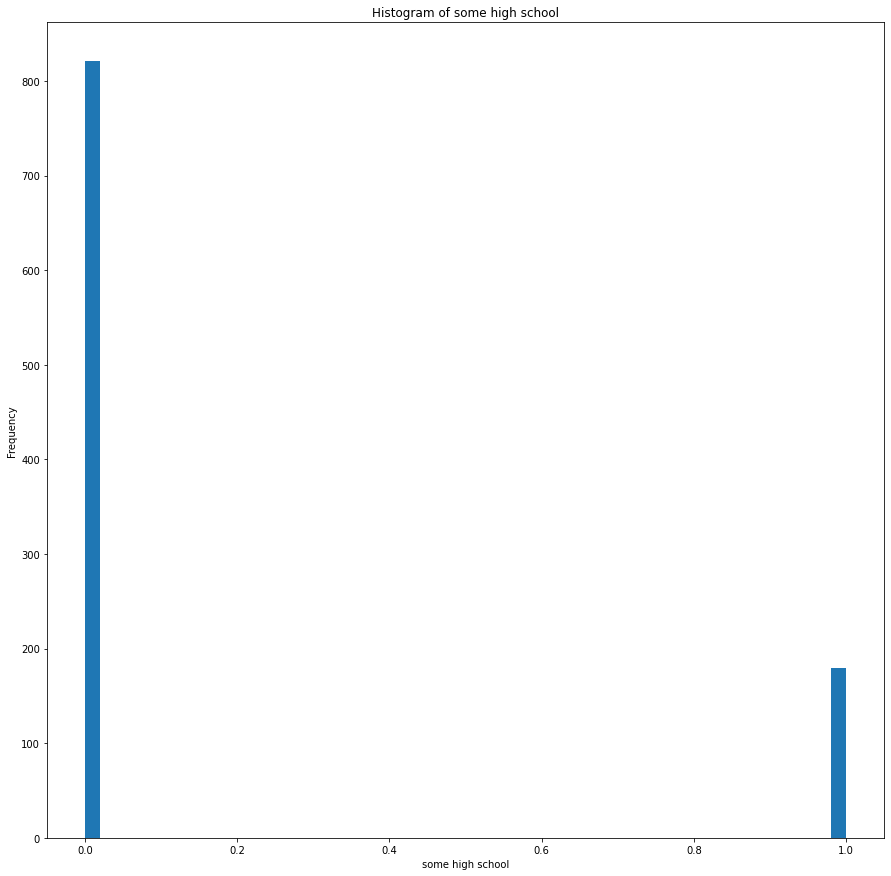

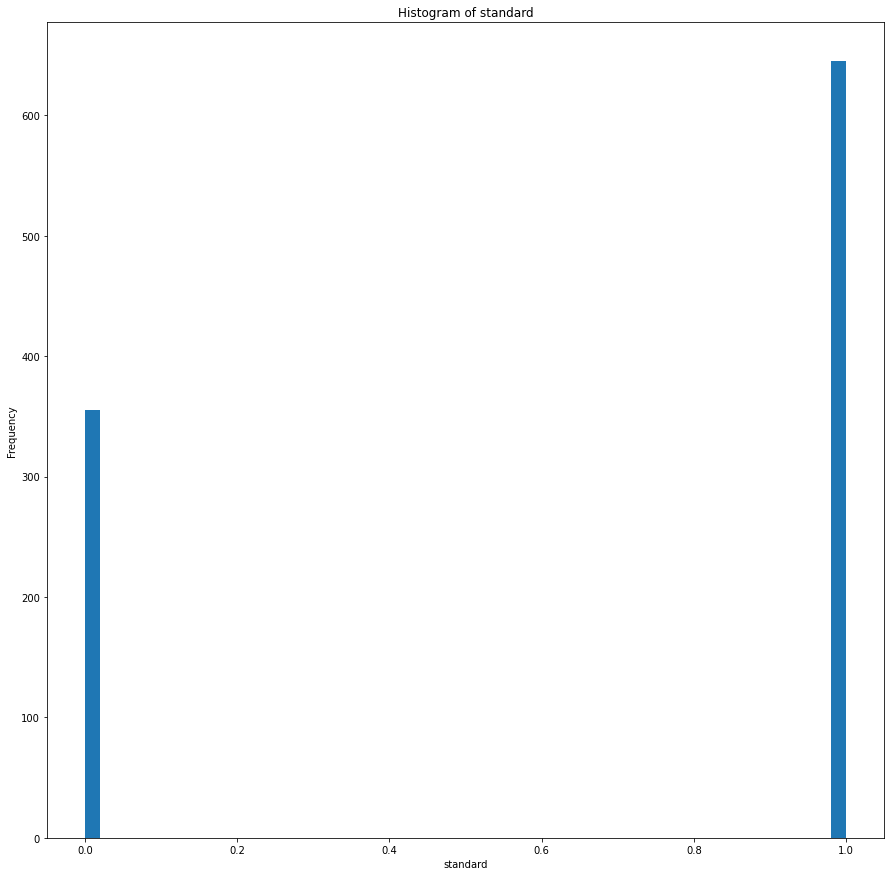

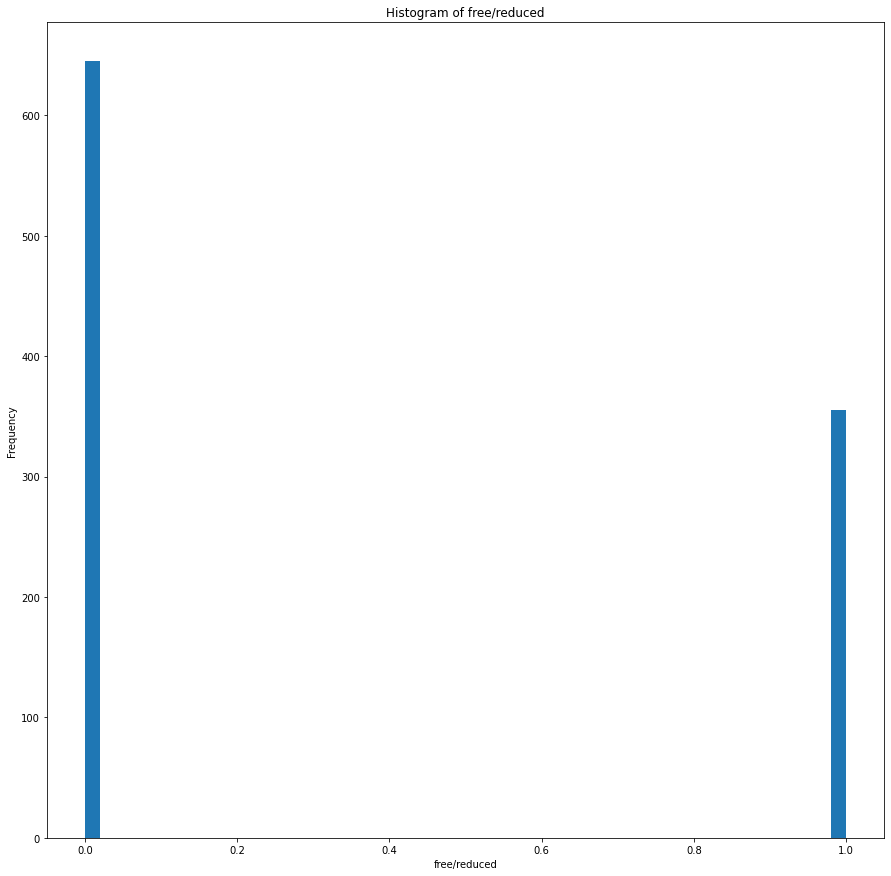

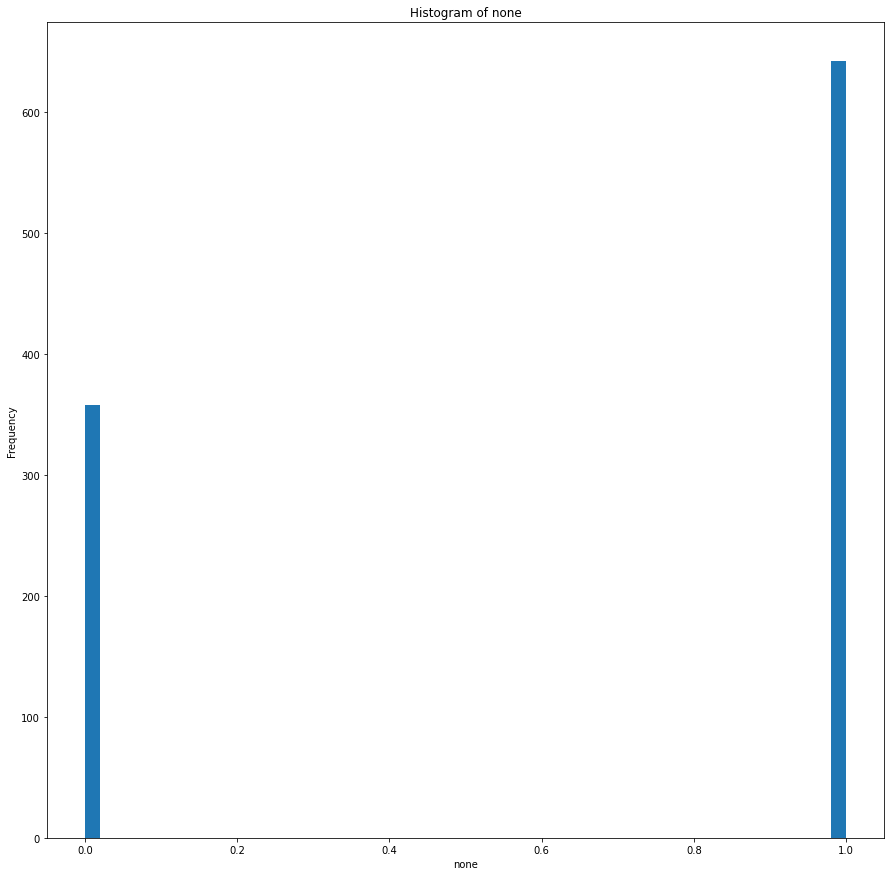

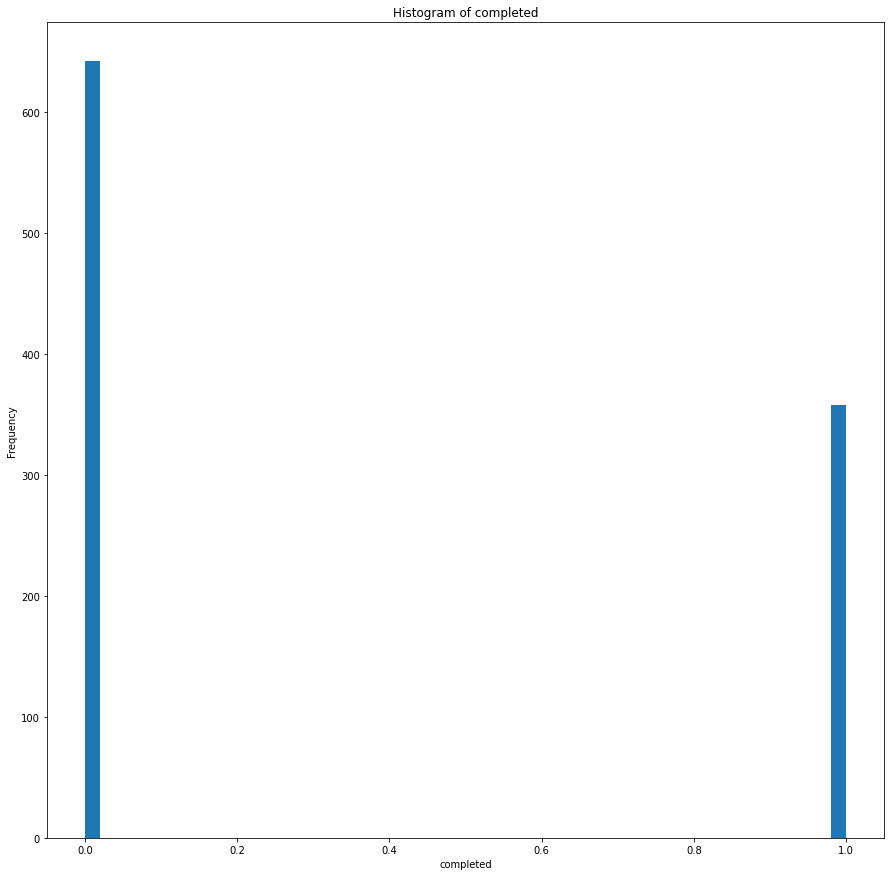

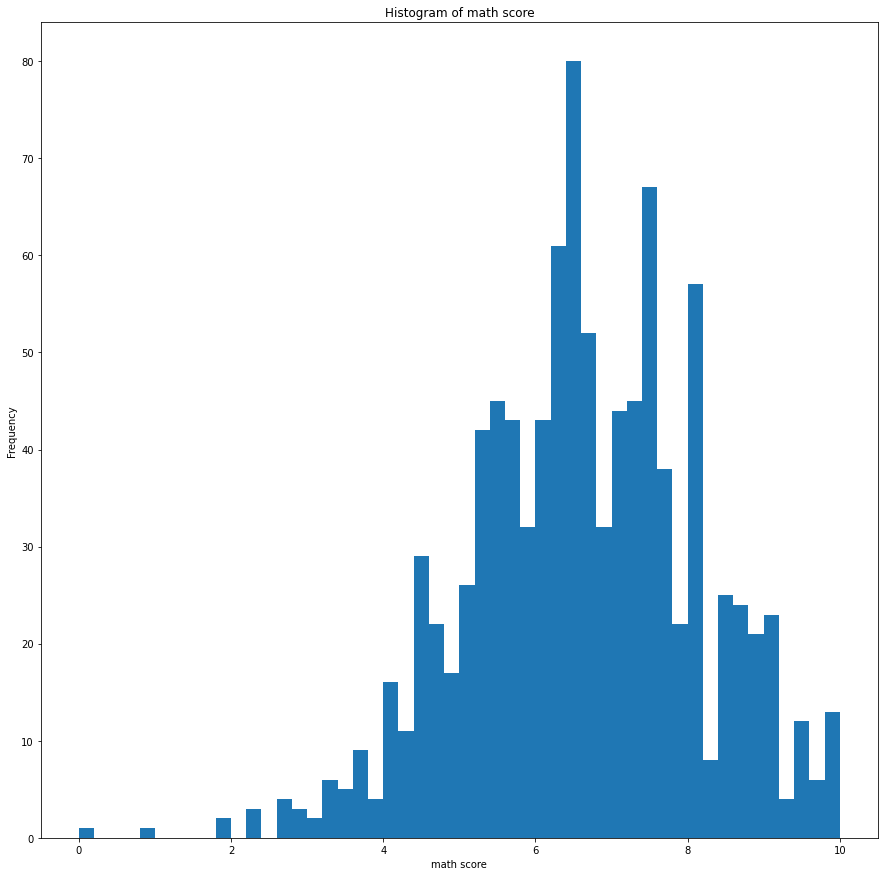

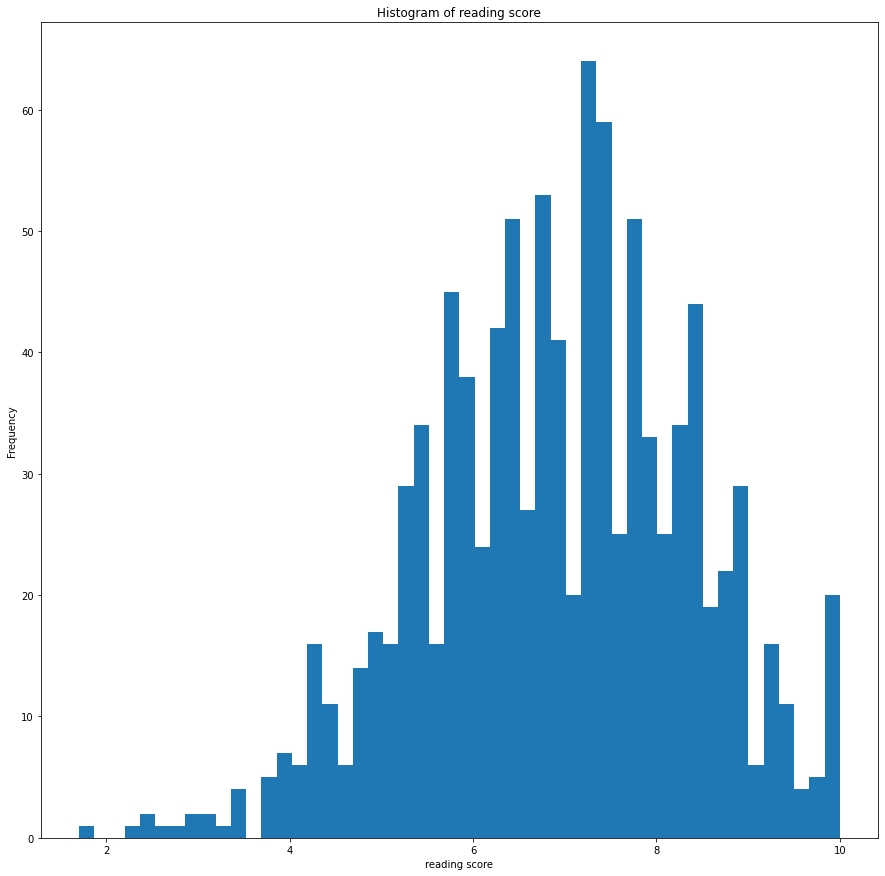

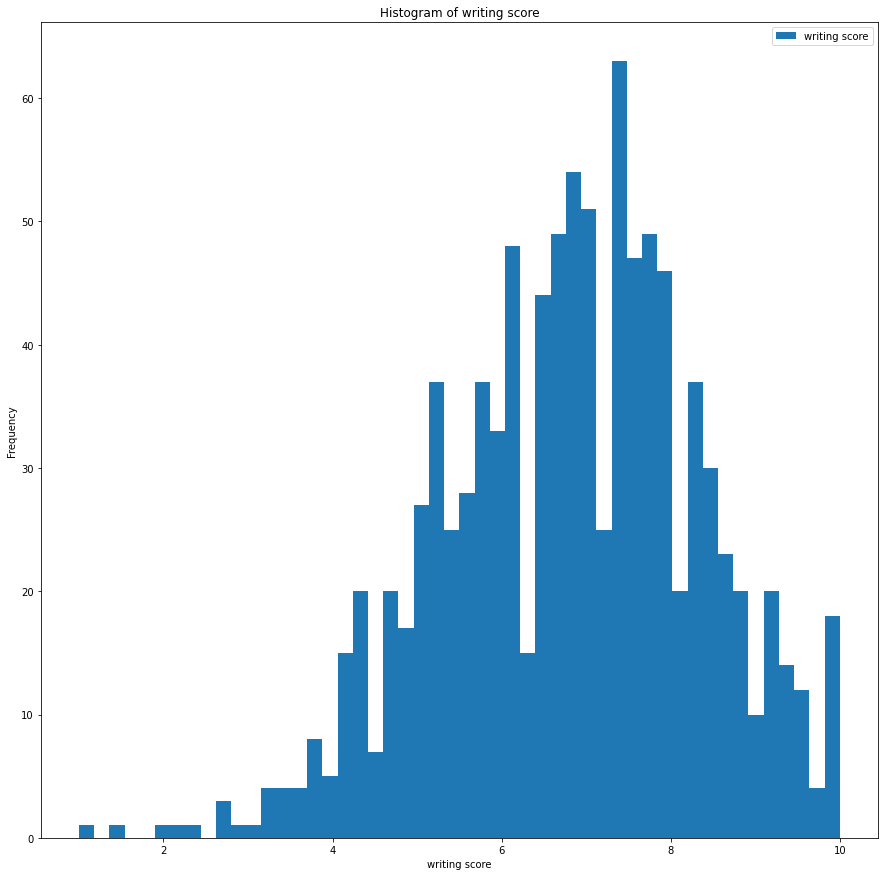

In [19]:
Histogram(Train_X)

In [20]:
def HistogramLayaout(df):
  pd.DataFrame.hist(data = df, figsize=(15,30), bins=50, layout=(10,2))
  plt.subplots_adjust(hspace=1.0) 
  return

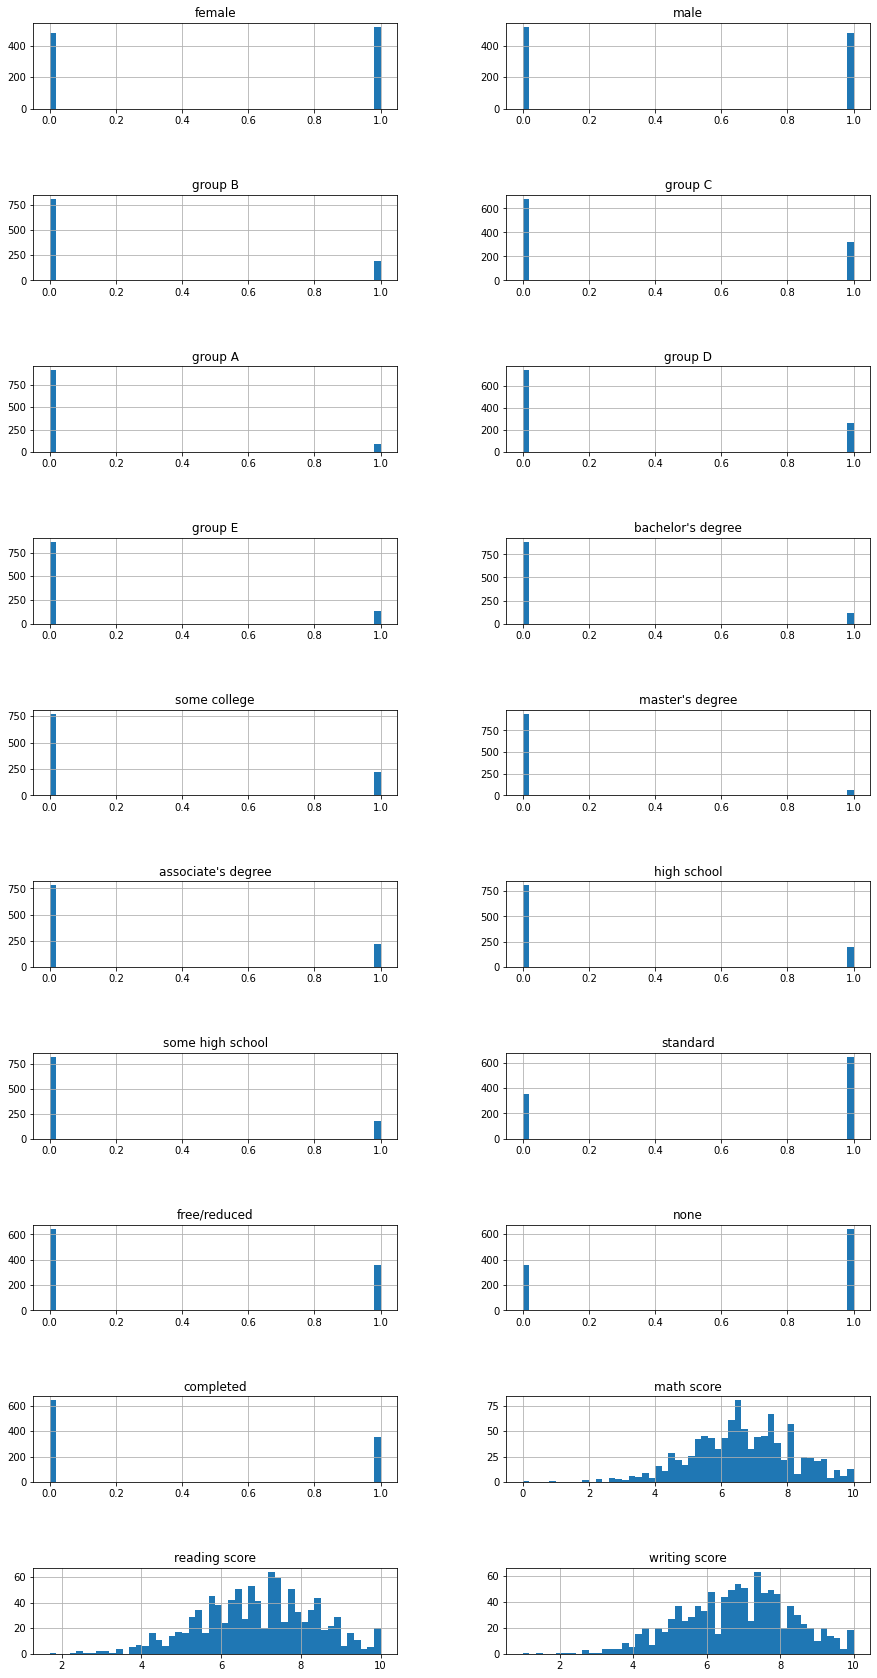

In [21]:
HistogramLayaout(Train_X)

In [22]:
from matplotlib import cm
def ScatterMatrix(df,y):
  cmap = cm.get_cmap('Set1')
  c = df.columns
  pd.plotting.scatter_matrix(df, c=y, cmap=cmap, figsize=(15, 15));
  return

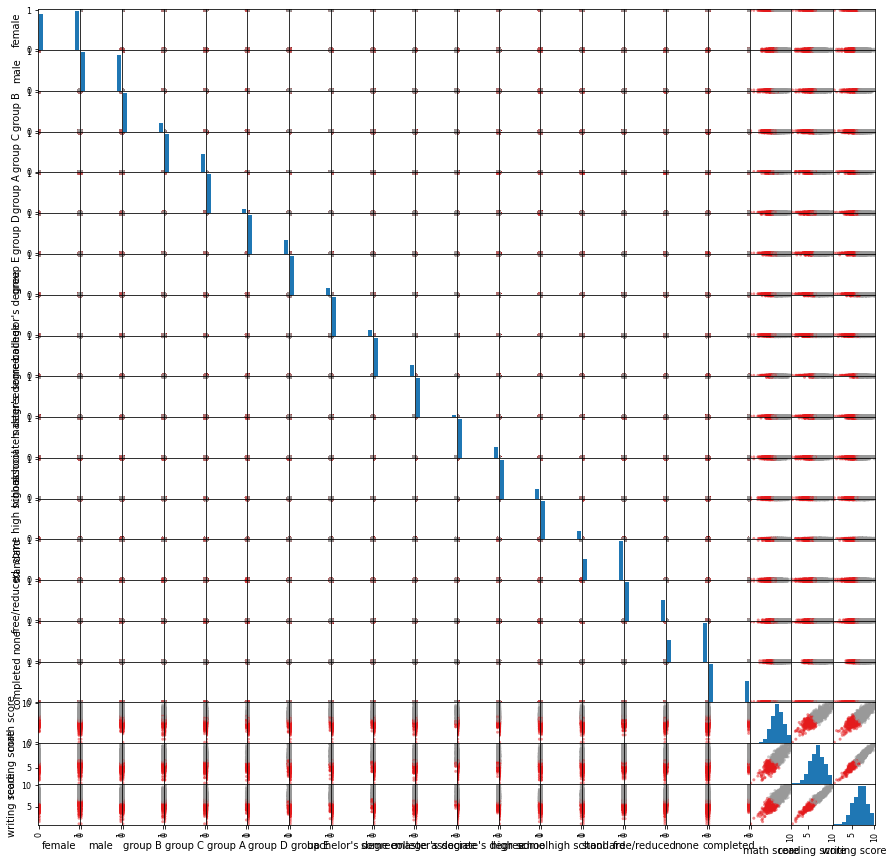

In [23]:
ScatterMatrix(Train_X,Train_Y)

In [24]:
def plot_decision_region(X, pred_fun):      #Función para visualizar la superficie de decisión de nuestro algoritmo.
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")
    
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

def plot_data(X, y):   #Función para graficar datos (X,y)
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color.reshape(1,-1),
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

In [25]:
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Matriz de confusión',
                          cmap=pl.cm.Blues):
    print(cm) # Confusion matrix

    pl.imshow(cm, interpolation='nearest', cmap=cmap) # Pintamos la matriz como una imagen
    pl.title(title)
    pl.colorbar()
    tick_marks = np.arange(len(classes))
    pl.xticks(tick_marks, classes, rotation=45) # Nombre de las clases en X
    pl.yticks(tick_marks, classes) # Nombre de las clases en Y

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pl.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black") 
        # Anotamos cada sección de la imagen con su valor correspondiente en la matriz

    pl.tight_layout()
    pl.ylabel('Valor de verdad')
    pl.xlabel('Valor predicho')

In [26]:
from sklearn.linear_model import LogisticRegression
import pylab as pl
from sklearn.metrics import confusion_matrix
from sklearn import metrics
def Training(df,y):
  column = df.columns
  classifier = LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=300)
  for i in column:
    for j in column:
      if i != j:
        x = df[[i,j]]
        classifier.fit(x,y)
        predictions = classifier.predict(x)
        print("Clasificador", i ,"vs", j)
        print('Valores reales: {}'.format(np.array(y)))
        print('Predicciones: {}'.format(predictions))
        pl.figure(figsize = (8,16/3))    
        plot_decision_region(x, gen_pred_fun(classifier))
        plot_data(x, y)
        cnf_matrix_FP = confusion_matrix(y, predictions )
        cnf_matrix_FP
        pl.figure()
        plot_confusion_matrix(cnf_matrix_FP, classes=['0','1'],
        title='Matriz de confusión de FP')
        pl.show()
        print('Accuracy Multinomial classifier: {}'.format(classifier.score(x, y)))
        print('Precisión macro: {}'.format(metrics.precision_score(y, predictions, average='macro')))
        print('Precisión micro: {}'.format(metrics.precision_score(y, predictions, average='micro')))
        print('Precisión pesada: {}'.format(metrics.precision_score(y, predictions, average='weighted')))
  return

In [27]:
Training(Train_X, Train_Y)

Clasificador female vs male
Valores reales: [1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 

TypeError: ignored

<Figure size 576x384 with 0 Axes>